In [154]:
import pandas as pd
import spacy

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

### Loading Datasets ###

In [123]:
nlp = spacy.load('en_core_web_lg')

In [124]:
reviews_df = pd.read_csv("amazon_product_reviews.csv", low_memory=False)

In [125]:
reviews_df.sample(10)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
10089,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-07-29T00:00:00.000Z,2017-05-21T01:50:58Z,"2017-04-30T00:13:00.000Z,2017-06-07T08:17:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,I am very happy with this purchase. The price ...,I'm very happy with the kindle fire.,NaN,NaN,Steph
16146,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...",B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2017-01-17T00:00:00.000Z,2017-06-21T07:37:46Z,"2017-06-04T02:16:32.325Z,2017-06-03T18:41:08.209Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5026300/review...,my kid loves it of course. I haven't had a cha...,good for kids,NaN,NaN,dad1
2327,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-16T00:00:00.000Z,2017-05-21T06:03:00Z,"2017-04-30T00:45:00.000Z,2017-06-07T09:04:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,Bought for my wife.. she loves it.. took some ...,Good tablet,NaN,NaN,Keebeler
6869,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-12-08T00:00:00.000Z,2017-05-21T01:19:46Z,"2017-04-30T00:08:00.000Z,2017-06-07T08:15:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,"Love it. never an issue, just like a computer ...",Great Product,NaN,NaN,Jada
6474,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-04-17T00:00:00.000Z,2017-05-21T01:18:19Z,"2017-04-30T00:08:00.000Z,2017-06-07T08:18:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5025800/review...,For the price hands down best tablet out there...,Great value,NaN,NaN,Carlos
19096,AV1YnRtnglJLPUi8IJmV,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B00OQVZDJM,Amazon,"Walmart for Business,Office Electronics,Tablet...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,2016-09-09T00:00:00.000Z,2017-09-05T22:09:30Z,"2017-08-31T22:33:22.760Z,2017-08-02T19:53:55.2...",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/9439005/review...,it was mainly purchased for reading in dark. i...,Serves the purpose,NaN,NaN,Raja
12521,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2016-02-27T00:00:00.000Z,2017-05-21T03:21:00Z,"2017-04-30T00:22:00.000Z,2017-06-07T08:20:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,My kindle fire has been easy to use and allows...,Really enjoy my kindle fire.,NaN,NaN,Chexy123
17267,AVqVGWLKnnc1JgDc3jF1,Amazon Kindle Paperwhite - eBook reader - 4 GB...,B018Y23MNM,Amazon,"Tablets,Fire Tablets,Computers & Tablets,All T...",firekidseditiontablet7displaywifi16gbgreenkidp...,Amazon,2017-01-30T00:00:00.000Z,2017-06-21T07:38:43Z,"2017-06-04T02:18:08.226Z,2017-06-03T18:42:22.695Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5026300/review...,"Easy to use, easy apps and books, you can use ...","Easy to use, full of great apps",NaN,NaN,170904mom
3320,AVsRjfwAU2_QcyX9PHqe,"All-New Kindl

In [126]:
# maintaining only necessary columns while dropping all others
reviews_df = reviews_df[["reviews.title", "reviews.text", "reviews.rating"]].dropna()

In [127]:
reviews_df.head(10)

,reviews.title,reviews.text,reviews.rating
0,Kindle,This product so far has not disappointed. My c...,5.0
1,very fast,great for beginner or experienced person. Boug...,5.0
2,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,5.0
3,Good!!!,I've had my Fire HD 8 two weeks now and I love...,4.0
4,Fantastic Tablet for kids,I bought this for my grand daughter when she c...,5.0
5,Just what we expected,This amazon fire 8 inch tablet is the perfect ...,5.0
6,great e-reader tablet,"Great for e-reading on the go, nice and light ...",4.0
7,Great for gifts,"I gave this as a Christmas gift to my inlaws, ...",5.0
8,Great for reading,Great as a device to read books. I like that i...,5.0
9,Great and lightweight reader,I love ordering books and reading them with th...,5.0


### EDA and Text Pre processing ###

In [128]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34620 entries, 0 to 34659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviews.title   34620 non-null  object 
 1   reviews.text    34620 non-null  object 
 2   reviews.rating  34620 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [129]:
reviews_df.isna().sum()

reviews.title     0
reviews.text      0
reviews.rating    0
dtype: int64

Look like there are not any null values. So we can now start working on our reviews

In [130]:
reviews_df["reviews.rating"].value_counts()

reviews.rating
5.0    23769
4.0     8540
3.0     1499
1.0      410
2.0      402
Name: count, dtype: int64

In [131]:
# creates tokens of the words in the text
def preprocess(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not (token.is_stop or token.is_punct or token.is_digit)])

There are around 35 000 records. But it takes too long to process all of them, so let's use only 20 000 of them for now.

In [132]:
reviews_df = reviews_df.iloc[:20000, :]

reviews_df["cleaned_reviews"] = reviews_df["reviews.text"].apply(preprocess)
reviews_df.head(10)

,reviews.title,reviews.text,reviews.rating,cleaned_reviews
0,Kindle,This product so far has not disappointed. My c...,5.0,product far disappoint child love use like abi...
1,very fast,great for beginner or experienced person. Boug...,5.0,great beginner experienced person buy gift love
2,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,5.0,inexpensive tablet use learn step nabi thrille...
3,Good!!!,I've had my Fire HD 8 two weeks now and I love...,4.0,Fire HD week love tablet great value Prime Mem...
4,Fantastic Tablet for kids,I bought this for my grand daughter when she c...,5.0,buy grand daughter come visit set user enter a...
5,Just what we expected,This amazon fire 8 inch tablet is the perfect ...,5.0,amazon fire inch tablet perfect size purchase ...
6,great e-reader tablet,"Great for e-reading on the go, nice and light ...",4.0,great e reading nice light weight price point ...
7,Great for gifts,"I gave this as a Christmas gift to my inlaws, ...",5.0,give Christmas gift inlaw husband uncle love e...
8,Great for reading,Great as a device to read books. I like that i...,5.0,great device read book like link borrow librar...
9,Great and lightweight reader,I love ordering books and reading them with th...,5.0,love order book read reader


In [133]:
if 'spacytextblob' not in nlp.pipe_names:
    nlp.add_pipe('spacytextblob')


# calculates sentiment score
# 1 >= positive >= 0.5; 
# 0.5 > neutral > -0.5; 
# -0.5 >= negative >= negative
def get_sentiment(review):
    doc = nlp(review)

    if doc._.blob.polarity >= 0.5:
        return "positive"
    elif 0.5 > doc._.blob.polarity > -0.5:
        return "neutral"
    else:
        return "negative"

In [134]:
reviews_df["sentiment"] = reviews_df["cleaned_reviews"].apply(get_sentiment)
reviews_df.head(10)

,reviews.title,reviews.text,reviews.rating,cleaned_reviews,sentiment
0,Kindle,This product so far has not disappointed. My c...,5.0,product far disappoint child love use like abi...,neutral
1,very fast,great for beginner or experienced person. Boug...,5.0,great beginner experienced person buy gift love,positive
2,Beginner tablet for our 9 year old son.,Inexpensive tablet for him to use and learn on...,5.0,inexpensive tablet use learn step nabi thrille...,positive
3,Good!!!,I've had my Fire HD 8 two weeks now and I love...,4.0,Fire HD week love tablet great value Prime Mem...,neutral
4,Fantastic Tablet for kids,I bought this for my grand daughter when she c...,5.0,buy grand daughter come visit set user enter a...,neutral
5,Just what we expected,This amazon fire 8 inch tablet is the perfect ...,5.0,amazon fire inch tablet perfect size purchase ...,positive
6,great e-reader tablet,"Great for e-reading on the go, nice and light ...",4.0,great e reading nice light weight price point ...,positive
7,Great for gifts,"I gave this as a Christmas gift to my inlaws, ...",5.0,give Christmas gift inlaw husband uncle love e...,neutral
8,Great for reading,Great as a device to read books. I like that i...,5.0,great device read book like link borrow librar...,neutral
9,Great and lightweight reader,I love ordering books and reading them with th...,5.0,love order book read reader,positive


So we can see some of the sentiments are neutral, while the rating of these reviews are 5 or 4. This means our sentiment function is not working well. Let's try to develop actual sentiment model.

### Labelling ###

Let's label them first depending on reviews.rating score. 

In [135]:
reviews_df["reviews.rating"].value_counts()

reviews.rating
5.0    12899
4.0     5542
3.0     1016
2.0      274
1.0      269
Name: count, dtype: int64

Let's label 5 and 4 as a positive, 3 as a neutral and 1, 2 as a negative

In [136]:
def label_reviews(rating):
    if rating == 5 or rating == 4:
        return "positive"
    elif rating == 2 or rating == 1:
        return "negative"
    else:
        return "neutral"

In [ ]:
reviews_df["category"] = reviews_df["reviews.rating"].apply(label_reviews)
reviews_df["category"].value_counts()

In [138]:
reviews_df.sample(10)

,reviews.title,reviews.text,reviews.rating,cleaned_reviews,sentiment,category
8803,Excellent entertainment tablet for beginner,"Within the low price range, this tablet is exc...",5.0,low price range tablet excellent watch tv movi...,neutral,positive
19632,great reader,I have an older Kindle. I usually read without...,5.0,old Kindle usually read lighting like have opt...,neutral,positive
11483,Tablet is great for my needs.,Enjoy my tablet. Easy to carry in purse. It wa...,5.0,enjoy tablet easy carry purse great buy love read,positive,positive
8859,mother has a hard time understanding,Bought it for my mom so we can stay in touch a...,3.0,buy mom stay touch play crossword game Bingo N...,neutral,neutral
1990,great tablet for the price and easy to operate,this is a great tablet for under $100 and you ...,5.0,great tablet $ add kodi s good feature duel si...,positive,positive
1117,Amazon is the best,This tablet exceeds its reviews. its easy to u...,5.0,tablet exceed review easy use screen great,positive,positive
15889,Nice,It's a lovely game for kids wolf my daughter h...,5.0,lovely game kid wolf daughter love,neutral,positive
8522,Works as it should. Happy with it.,It works great as advertised. I bought a Micro...,5.0,work great advertise buy Micro SD card upgrade...,positive,positive
13735,Great tablet for even a beginner,Got as a Christmas gift for my aunt and she lo...,5.0,got Christmas gift aunt love highly recommend ...,neutral,positive
8187,Pretty Blue Kindle,I purchased 3 of these Kindle's for my grandch...,5.0,purchase Kindle grandchild husband Christmas l...,positive,positive


Now we remove all unnecessary columns

In [139]:
columns = ["reviews.title", "reviews.text", "reviews.rating", "sentiment"]

reviews_df["text.length"] = reviews_df["cleaned_reviews"].apply(len)

reviews_df = reviews_df.drop(columns=columns)

In [142]:
reviews_df.sample(10)

,cleaned_reviews,category,text.length
8341,person buy love tablet actually expensive load...,positive,50
8771,get jib make good tablet kid play,neutral,33
16291,4yr old able operate flawlessly include case w...,neutral,86
4869,let honest think satisfied $ tablet think good...,positive,377
12556,ease touch screen make easy use arthritis old ...,positive,58
7329,buy yr old not lot educational app,positive,34
6506,kid love new tablet Easy use,positive,28
18667,product light make easy read,positive,28
17055,slow performance application freeze work charg...,neutral,64
471,Fire HD8 strike excellent balance performance ...,positive,125


### Vectorization ###

In [143]:
# creates vector form of the each word
def get_doc_embedding(review):
    doc = nlp(review)

    return doc.vector

In [144]:
reviews_df["review_vector"] = reviews_df["cleaned_reviews"].apply(get_doc_embedding)
reviews_df.head(10)

,cleaned_reviews,category,text.length,review_vector
0,product far disappoint child love use like abi...,positive,79,"[0.054878335, 0.9984474, -2.654489, 0.04398834..."
1,great beginner experienced person buy gift love,positive,47,"[-1.6740358, -2.1884587, -3.7127316, -2.619348..."
2,inexpensive tablet use learn step nabi thrille...,positive,59,"[0.25868428, 0.8893498, 0.018769953, -1.333110..."
3,Fire HD week love tablet great value Prime Mem...,positive,323,"[-0.4144448, 0.7188587, -3.3641176, 0.7249728,..."
4,buy grand daughter come visit set user enter a...,positive,298,"[-0.34229454, 0.8031177, -2.1945102, 0.0453326..."
5,amazon fire inch tablet perfect size purchase ...,positive,102,"[-0.9132935, 0.7910495, -3.6267226, 0.1875006,..."
6,great e reading nice light weight price point ...,positive,76,"[0.46890584, 1.4473648, -1.7725244, 0.26782247..."
7,give Christmas gift inlaw husband uncle love e...,positive,71,"[-1.2324872, -0.9387156, -2.9495156, -2.058727..."
8,great device read book like link borrow librar...,positive,156,"[-0.4652737, 0.4427889, -0.013706501, -1.27728..."
9,love order book read reader,positive,27,"[1.6236715, -1.42432, -0.48016006, -2.65908, 0..."


### Encoding category ###

In [145]:
label_encoder = LabelEncoder()

reviews_df["category"] = label_encoder.fit_transform(reviews_df["category"])

reviews_df.head(10)

,cleaned_reviews,category,text.length,review_vector
0,product far disappoint child love use like abi...,2,79,"[0.054878335, 0.9984474, -2.654489, 0.04398834..."
1,great beginner experienced person buy gift love,2,47,"[-1.6740358, -2.1884587, -3.7127316, -2.619348..."
2,inexpensive tablet use learn step nabi thrille...,2,59,"[0.25868428, 0.8893498, 0.018769953, -1.333110..."
3,Fire HD week love tablet great value Prime Mem...,2,323,"[-0.4144448, 0.7188587, -3.3641176, 0.7249728,..."
4,buy grand daughter come visit set user enter a...,2,298,"[-0.34229454, 0.8031177, -2.1945102, 0.0453326..."
5,amazon fire inch tablet perfect size purchase ...,2,102,"[-0.9132935, 0.7910495, -3.6267226, 0.1875006,..."
6,great e reading nice light weight price point ...,2,76,"[0.46890584, 1.4473648, -1.7725244, 0.26782247..."
7,give Christmas gift inlaw husband uncle love e...,2,71,"[-1.2324872, -0.9387156, -2.9495156, -2.058727..."
8,great device read book like link borrow librar...,2,156,"[-0.4652737, 0.4427889, -0.013706501, -1.27728..."
9,love order book read reader,2,27,"[1.6236715, -1.42432, -0.48016006, -2.65908, 0..."


### Positive - 2, Neutral - 1, Negative - 0

In [146]:
reviews_df.category.value_counts()

category
2    18441
1     1016
0      543
Name: count, dtype: int64

### Dividing data into features and target ###

Now we create a new column for each vector and we use each new column as a feature 

In [147]:
review_vectors_df = reviews_df['review_vector'].apply(lambda vector: pd.Series(vector))
features_df = review_vectors_df.join(reviews_df['text.length'])
features_df.columns = features_df.columns.astype(str)

features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,text.length
0,0.054878,0.998447,-2.654489,0.043988,2.220023,-0.072042,1.390376,4.340241,-4.549300,-0.295129,...,-1.665380,-0.018139,-0.921403,-0.713987,-0.783628,0.769324,-1.002197,-3.416529,1.606364,79
1,-1.674036,-2.188459,-3.712732,-2.619349,0.784464,1.016893,2.367308,2.183128,-3.867471,0.586361,...,0.047751,-1.164008,-1.376394,-1.457477,-2.384837,-0.789657,2.432463,-3.593261,-0.431753,47
2,0.258684,0.889350,0.018770,-1.333110,-0.239798,0.465441,-0.532787,0.961081,-5.122130,1.366601,...,-1.651458,-0.186464,-0.560807,0.716641,-2.783326,0.204651,-0.127211,-2.425972,-0.817969,59
3,-0.414445,0.718859,-3.364118,0.724973,0.580903,-0.592890,1.794042,2.928200,-2.725754,-0.378467,...,0.317549,0.467490,0.011022,-0.338227,0.736255,0.871529,-1.055821,-1.718852,0.495873,323
4,-0.342295,0.803118,-2.194510,0.045333,0.846540,0.829211,1.369973,3.669507,-2.771239,0.938031,...,-0.270222,-0.022945,0.273825,-0.753031,-0.090764,-0.530125,-0.000917,-2.362792,0.634489,298


In [148]:
#now let's divide them into train and test sets
X = features_df

y = reviews_df["category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:


# Column Transformer transforms the columns and applied the function in this case it is standardization
# also i tried to use Normalization for word vectors
ct = ColumnTransformer(
    transformers=[
        (
            "scaling",
            StandardScaler(),
            ["text.length"],
        ),
        (
            "minmax",
            MinMaxScaler(),
            [str(i) for i in range(300)]
        )
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)

In [157]:
# creating our pipeline
clf_pipe = Pipeline(
    steps=[('scaling', ct),
           ('clf', MLPClassifier()),
           ]
)

# let's define the hyper parameters 
hparameters = {
    'clf__hidden_layer_sizes': ((20, 20), (30, 30)),  # neural network nodes
    'clf__learning_rate_init': [0.0001, 0.001],  # learning rate
}

# GridSearchCV finds best hyper parameter
clf_search = GridSearchCV(clf_pipe, hparameters, scoring="accuracy", cv=5)

clf_search.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['text.length']),
                                                                        ('minmax',
                                                                         MinMaxScaler(),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                                                                          '7',
                                                                          '8',
                                                                          '9',
                                                                          '10',
                                                                          '11',
                                                                          '12',
                                                                          '13',
                                                                          '14',
                                                                          '15',
                                                                          '16',
                                                                          '17',
                                                                          '18',
                                                                          '19',
                                                                          '20',
                                                                          '21',
                                                                          '22',
                                                                          '23',
                                                                          '24',
                                                                          '25',
                                                                          '26',
                                                                          '27',
                                                                          '28',
                                                                          '29', ...])],
                                                          verbose_feature_names_out=False)),
                                       ('clf', MLPClassifier())]),
             param_grid={'clf__hidden_layer_sizes': ((20, 20), (30, 30)),
                         'clf__learning_rate_init': [0.0001, 0.001]},
             scoring='accuracy')

In [158]:
print("Best score and hyperparameter:", clf_search.best_score_, clf_search.best_params_)

best_clf = clf_search.best_estimator_

Best score and hyperparameter: 0.926375 {'clf__hidden_layer_sizes': (30, 30), 'clf__learning_rate_init': 0.001}


              precision    recall  f1-score   support

    negative       0.33      0.04      0.07       120
     neutral       0.40      0.01      0.02       229
    positive       0.92      1.00      0.96      3651

    accuracy                           0.91      4000
   macro avg       0.55      0.35      0.35      4000
weighted avg       0.87      0.91      0.88      4000


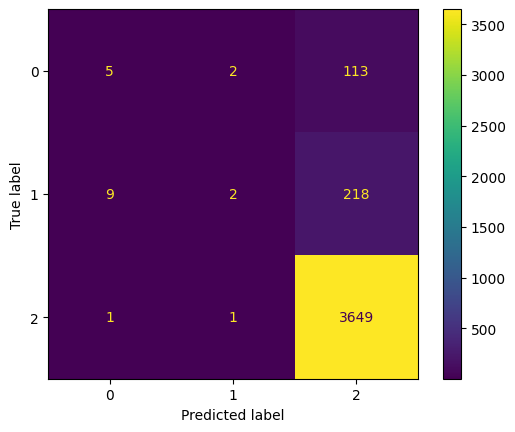

In [160]:
# now lets predict using best hyperparameters
y_pred = best_clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["negative", "neutral", "positive"]))

cm = ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test)

## Testing ##

In [162]:
def classify_text(text):
    tokenized_text = preprocess(text)
    vectorized_text = get_doc_embedding(tokenized_text)

    columns = [i for i in range(0, len(vectorized_text))]

    vectorized_df = pd.DataFrame([vectorized_text], columns=columns)

    vectorized_df.columns = vectorized_df.columns.astype(str)

    vectorized_df["text.length"] = pd.Series(len(vectorized_text))

    prediction = best_clf.predict(vectorized_df)

    if prediction == 2:
        return "Positive"
    elif prediction == 1:
        return "Neutral"
    else:
        return "Negative"


In [163]:
# Actual result: Positive
result = classify_text(
    "This jacket is simply fantastic! The quality is superb, keeping me warm and stylish. It's versatile, great for outdoor adventures or casual outings. Highly recommend!")

print("Result:", result)

Result: Positive


In [164]:
# Actual result: Positive
result = classify_text(
    "This car is phenomenal! It combines sleek design with top-notch performance. The driving experience is smooth and comfortable, with advanced features that enhance safety and convenience. Absolutely thrilled with this purchase!")

print("Result:", result)

Result: Positive


In [165]:
# Actual result: Positive
result = classify_text(
    "This laptop is outstanding! It boasts impressive speed, remarkable battery life, and a sleek design. Its high-resolution display and powerful performance make it perfect for work or entertainment. Couldn't be happier!")

print("Result:", result)

Result: Positive


In [166]:
# Actual result: Negative
result = classify_text(
    "These pants are a disappointment. The fabric feels cheap and uncomfortable, and the fit is completely off. After just a few wears, seams started unraveling. Definitely not worth the price, regret buying them.")

print("Result:", result)

Result: Positive


In [167]:
# Actual result: Negative
result = classify_text(
    "This laptop is a letdown. Despite its promising specs, it constantly lags and freezes. The battery drains quickly, and the build quality feels flimsy. Customer support is unhelpful, leaving me frustrated and regretting my purchase.")

print("Result:", result)

Result: Negative


In [168]:
# Actual result: Negative
result = classify_text(
    "This phone is frustratingly unreliable. It frequently crashes, the battery life is abysmal, and the camera quality is disappointing. Despite its high price, it's plagued with glitches and lacks essential features. Utterly regret purchasing it.")

print("Result:", result)

Result: Positive


In [169]:
# Actual result: Neutral
result = classify_text(
    "This card offers standard features and functionality. While it serves its purpose adequately, it lacks standout attributes or innovative benefits. It's a decent choice for everyday use but doesn't particularly excel in any specific aspect.")

print("Result:", result)

Result: Positive


In [170]:
# Actual result: Neutral
result = classify_text(
    "This car provides a satisfactory driving experience. It meets basic expectations for performance and comfort without exceeding them. While it's reliable for daily transportation, it doesn't offer any remarkable features or exceptional qualities.")

print("Result:", result)

Result: Positive


Over all model performing really good on positive comments (finds correct 3 out of 3) and on negative reviews it found correct 1 out 3, not bad. However, model did not work well for neutral comments.

I think one of the reasons why model did not perform well on neutral comments is due to small number of datasets. We used only 20 000 out of around 35 000

In [171]:
reviews_df.category.value_counts()

category
2    18441
1     1016
0      543
Name: count, dtype: int64

From here we can see there are a lot of positive comments (18441) which worked well, however number of negative and neutral comments are less which led poor performance of the model. But that means there are some works to optimize our model.